In [65]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import json
from webdriver_manager.chrome import ChromeDriverManager
from pandas.io.json import json_normalize
import pandas as pd
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
pd.set_option('display.max_columns', None)

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get('https://www.whoscored.com/Matches/1485261/Live/England-Premier-League-2020-2021-Manchester-United-Arsenal')
data = driver.execute_script("return matchCentreData;")

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)
       
driver.close()

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [/Users/ollinj01/.wdm/drivers/chromedriver/mac64/86.0.4240.22/chromedriver] found in cache


In [4]:
home_team, away_team = data["home"]["name"], data["away"]["name"]
with open(f"{home_team}_{away_team}.json", "w") as f: ## save as Arsenal_Liverpool.json in present directory
    json.dump(data, f, indent=4)

In [5]:
# data

In [6]:
with open('Man Utd_Arsenal.json') as json_file:
    data = json.load(json_file)

event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []
passtype = []


for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

    for key, value in each.items():
        passType = 'OpenPlay'
        if key == 'qualifiers':
            for item in value:
                if item['type']['displayName'] == 'BigChanceCreated':
                    passType = item['type']['displayName']
                if item['type']['displayName'] == 'ShotAssist':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'CornerTaken':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'ThrowIn':
                    passType = item['type']['displayName']
            passtype.append(passType)
                
df = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team,
                       'Outcome':outcome, 'X':x, 'Y':y,'endX':endX, 'endY':endY, 'passtype':passtype})

In [7]:
df

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
0,Start,0,0,,13,Successful,0.0,0.0,,,OpenPlay
1,Start,0,0,,32,Successful,0.0,0.0,,,OpenPlay
2,Pass,0,1,73078,13,Successful,50.0,50.0,31.9,37.4,OpenPlay
3,Pass,0,3,288795,13,Unsuccessful,35.9,38.8,72.9,85,OpenPlay
4,Aerial,0,6,331924,32,Successful,28.2,12.0,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1638,End,94,17,,13,Successful,0.0,0.0,,,OpenPlay
1639,End,0,0,,32,Successful,0.0,0.0,,,OpenPlay
1640,End,0,0,,13,Successful,0.0,0.0,,,OpenPlay
1641,FormationSet,0,0,,32,Successful,0.0,0.0,,,OpenPlay


In [8]:
mask = df['Player'] == 238940
thomas = df.loc[mask]
thomas.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
13,BallRecovery,0,26,238940,13,Successful,63.9,75.0,,,OpenPlay
14,Pass,0,27,238940,13,Unsuccessful,65.1,78.2,77.5,72.9,OpenPlay
20,Pass,0,37,238940,13,Successful,53.0,90.5,55.8,77,OpenPlay
49,Pass,2,3,238940,13,Successful,51.8,14.9,56.8,6.4,OpenPlay
51,BallRecovery,2,5,238940,13,Successful,53.4,15.3,,,OpenPlay


In [9]:
mask = df['Player'] == 125209
elneny = df.loc[mask]
elneny.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
17,Pass,0,33,125209,13,Successful,60.1,69.7,42.1,70.2,OpenPlay
23,Pass,0,47,125209,13,Successful,31.4,58.8,23.1,64.3,OpenPlay
29,Pass,1,3,125209,13,Unsuccessful,26.5,13.1,59.3,8.8,OpenPlay
39,BallRecovery,1,29,125209,13,Successful,57.6,86.2,,,OpenPlay
40,Pass,1,31,125209,13,Unsuccessful,60.1,96.6,62.3,96.8,OpenPlay


In [10]:
mask = (thomas['Event'] == 'Tackle') | (thomas['Event'] == 'Challenge') | (thomas['Event'] == 'BallRecovery') | (thomas['Event'] == 'Foul') | (thomas['Event'] == 'Interception')
thomas = thomas.loc[mask]
thomas.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
13,BallRecovery,0,26,238940,13,Successful,63.9,75.0,,,OpenPlay
51,BallRecovery,2,5,238940,13,Successful,53.4,15.3,,,OpenPlay
57,Tackle,2,9,238940,13,Successful,56.4,5.9,,,OpenPlay
90,BallRecovery,3,47,238940,13,Successful,64.6,87.2,,,OpenPlay
116,Interception,4,47,238940,13,Successful,61.6,38.9,,,OpenPlay


In [11]:
mask = (elneny['Event'] == 'Tackle') | (elneny['Event'] == 'Challenge') | (elneny['Event'] == 'BallRecovery') | (elneny['Event'] == 'Foul') | (elneny['Event'] == 'Interception')
elneny = elneny.loc[mask]
elneny.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
39,BallRecovery,1,29,125209,13,Successful,57.6,86.2,,,OpenPlay
201,Interception,9,23,125209,13,Successful,45.0,72.0,,,OpenPlay
264,Interception,12,2,125209,13,Successful,65.7,75.1,,,OpenPlay
695,BallRecovery,36,40,125209,13,Successful,74.9,74.1,,,OpenPlay
1125,BallRecovery,60,3,125209,13,Successful,53.8,56.9,,,OpenPlay


In [12]:
defpoints_thomas = thomas[['X', 'Y']].values

In [13]:
hull_thomas = ConvexHull(thomas[['X','Y']])

In [14]:
defpoints_elneny = elneny[['X', 'Y']].values

In [15]:
hull_elneny = ConvexHull(elneny[['X','Y']])

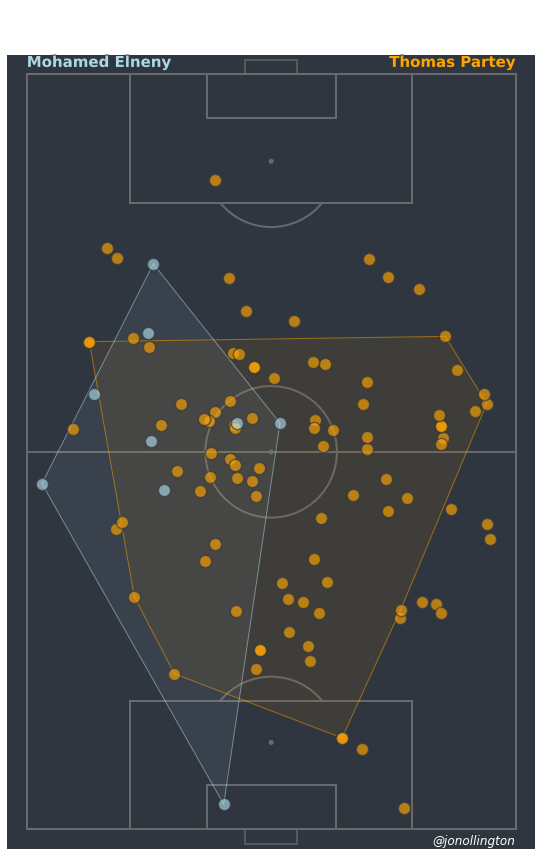

In [90]:
background = "#303640"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'

#Plot the X & Y location with dots
pitch = Pitch(figsize=(20,12),orientation='vertical',view='full',layout=(1, 1),goal_type='box',pitch_type='opta',
#                             axis=True, label=True, tick=True,
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()
ax.scatter(thomas['Y'],thomas['X'],color='orange', s=150, zorder=12,alpha=0.65, ec=background,lw=1.5)

for simplex in hull_thomas.simplices:
    #Draw a black line between each
    ax.plot(defpoints_thomas[simplex, 1], defpoints_thomas[simplex, 0], 'k-', alpha=0.5, lw=1, c='orange')
    ax.fill(defpoints_thomas[hull_thomas.vertices,1], defpoints_thomas[hull_thomas.vertices,0], 'k', alpha=0.01, color='orange')
    
ax.scatter(elneny['Y'],elneny['X'],color='lightblue', s=150, zorder=12,alpha=0.65, ec=background,lw=1.5)

for simplex in hull_elneny.simplices:
    #Draw a black line between each
    ax.plot(defpoints_elneny[simplex, 1], defpoints_elneny[simplex, 0], 'k-', alpha=0.5, lw=1, c='lightblue')
    ax.fill(defpoints_elneny[hull_elneny.vertices,1], defpoints_elneny[hull_elneny.vertices,0], 'k', alpha=0.02, color='lightblue')


ax.text(100,106.5,"Manchester United vs Arsenal", fontsize=25,color='white',ha="left", fontweight="bold")
ax.text(100,104,"English Premier League 2020/21 | Arsenal midfield duo defensive actions", fontsize=13,color='white',ha="left")
n = ax.text(0,101,"Thomas Partey", fontsize=15,color='orange',ha="right",fontweight="bold")
n.set_path_effects([path_effects.withStroke(linewidth=2,foreground=background)])
o=ax.text(100,101,"Mohamed Elneny", fontsize=15,color='lightblue',ha="left",fontweight="bold")
o.set_path_effects([path_effects.withStroke(linewidth=2,foreground=background)])
o=ax.text(0,-2,"@jonollington", fontsize=12,color='white',ha="right",fontstyle="italic")

    
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("convex",bbox_inches="tight",dpi=200);

In [161]:
cmap = ListedColormap(['#800026', '#b60026', '#da141e', '#f33c25', '#f37134', '#fd9343', '#febe59', '#ffefa4', '#ffffcc'])

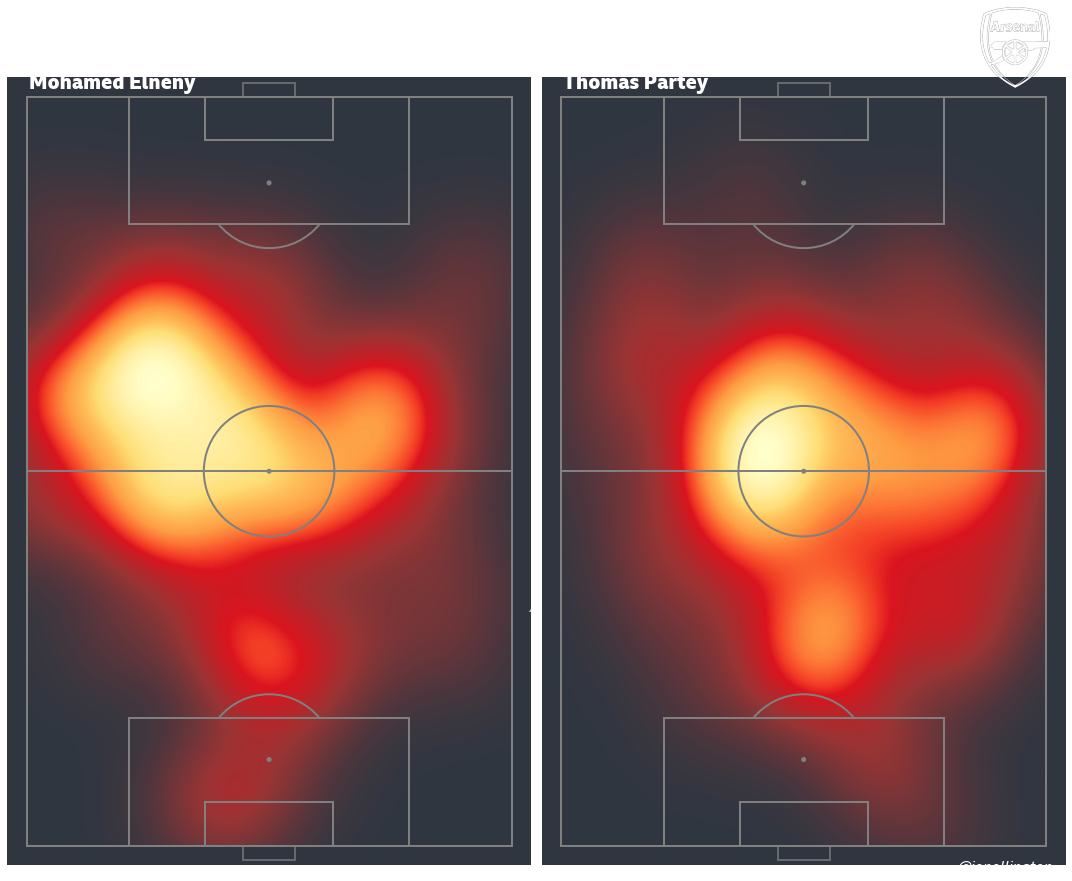

In [422]:
background = "#303640"
line = 'grey'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"

#Plot the X & Y location with dots
pitch = Pitch(figsize=(15,15),orientation='vertical',view='full',layout=(1, 2),goal_type='box',pitch_type='opta',
              line_zorder=12,
#                             axis=True, label=True, tick=True,
              pitch_color=background, line_color=line,constrained_layout=False)



fig, axarr = pitch.draw()

plt.sca(axarr[1])
sns.kdeplot(thomas['Y'],thomas['X'],shade='True', n_levels=1000,cmap=cmap,zorder=1,clip=((pitch.left, pitch.right), (pitch.bottom,pitch.top)) )


plt.sca(axarr[0])
sns.kdeplot(elneny['Y'],elneny['X'],shade='True', n_levels=1000,cmap=cmap,zorder=1,clip=((pitch.left, pitch.right), (pitch.bottom,pitch.top)) )


fig.text(0.03,0.91,"Manchester United vs Arsenal",fontweight="bold", fontsize=30,fontfamily=title_font, color=text_color)
fig.text(0.03,0.89,"English Premier League 2020/21 | Sun 01 Nov 2020 | Arsenal midfield duo heatmaps", fontsize=18,fontfamily=title_font, color=text_color)
fig.text(0.03,0.855,"Mohamed Elneny", fontweight="bold",fontsize=20,fontfamily=title_font, color=text_color)
fig.text(0.525,0.855,"Thomas Partey", fontweight="bold",fontsize=20,fontfamily=title_font, color=text_color)

fig.text(0.89,0.13,"@jonollington", fontstyle="italic",fontsize=15,fontfamily=title_font, color=text_color)

ax2 = fig.add_axes([0.905,0.855,0.075,0.075]) # badge
ax2.axis("off")
img = Image.open('./Arsenal.png')
ax2.imshow(img)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))

    
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("heatmap1",bbox_inches="tight",dpi=200);

In [383]:
mask = df['Player'] == 238940
thomas = df.loc[mask]
thomas.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
13,BallRecovery,0,26,238940,13,Successful,63.9,75.0,,,OpenPlay
14,Pass,0,27,238940,13,Unsuccessful,65.1,78.2,77.5,72.9,OpenPlay
20,Pass,0,37,238940,13,Successful,53.0,90.5,55.8,77,OpenPlay
49,Pass,2,3,238940,13,Successful,51.8,14.9,56.8,6.4,OpenPlay
51,BallRecovery,2,5,238940,13,Successful,53.4,15.3,,,OpenPlay


In [384]:
thomas.Event.value_counts()

Pass             57
BallRecovery     11
BallTouch         5
TakeOn            5
Tackle            4
Foul              3
Interception      2
BlockedPass       1
CornerAwarded     1
Challenge         1
Dispossessed      1
Aerial            1
SavedShot         1
Clearance         1
Name: Event, dtype: int64

In [385]:
mask = df['Player'] == 125209
elneny = df.loc[mask]
elneny.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
17,Pass,0,33,125209,13,Successful,60.1,69.7,42.1,70.2,OpenPlay
23,Pass,0,47,125209,13,Successful,31.4,58.8,23.1,64.3,OpenPlay
29,Pass,1,3,125209,13,Unsuccessful,26.5,13.1,59.3,8.8,OpenPlay
39,BallRecovery,1,29,125209,13,Successful,57.6,86.2,,,OpenPlay
40,Pass,1,31,125209,13,Unsuccessful,60.1,96.6,62.3,96.8,OpenPlay


In [123]:
thomas.Event.value_counts()

Pass             57
BallRecovery     11
BallTouch         5
TakeOn            5
Tackle            4
Foul              3
Interception      2
BlockedPass       1
CornerAwarded     1
Challenge         1
Dispossessed      1
Aerial            1
SavedShot         1
Clearance         1
Name: Event, dtype: int64

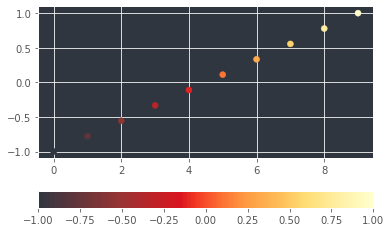

In [405]:
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#303640"],
        [norm( -0.51), "#983434"],
        [norm( -0.15), "#DA141E"],
        [norm( -0.05), "#F33C25"],
        [norm( 0.1), "#FC7134"],
        [norm( 0.25), "#FD9D43"],
        [norm( 0.45), "#FEBE59"],
        [norm( 0.6), "#FEDD74"],
        [norm( 0.8), "#FFEFA4"],
        [norm( 1.0), "#FFFFCC"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig, ax=plt.subplots()
x = np.arange(10)
y = np.linspace(-1,1,10)
sc = ax.scatter(x,y, c=y, norm=norm, cmap=cmap)
fig.colorbar(sc, orientation="horizontal")
plt.show()

In [390]:
pwd

'/Users/ollinj01/Football Analytics/who-scored/Pepe'